# Importing the Libraries and loading the datasets

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# Loading the Merged csv file & viewing the 1st 5 records
a=pd.read_csv("/kaggle/input/upliance-ai/merged_assignment_data.csv")
a.head()

,Session ID,User ID,Dish Name_x,Meal Type_x,Session Start,Session End,Duration (mins),Session Rating,User Name,Age,...,Total Orders,Order ID,Order Date,Meal Type_y,Dish Name_y,Order Status,Amount (USD),Time of Day,Rating,Age Group
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5,Alice Johnson,28,...,12,1001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,26-35
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0,Bob Smith,35,...,8,1002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,26-35
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8,Charlie Lee,42,...,15,1003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,36-45
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2,Alice Johnson,28,...,12,1004,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,26-35
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7,David Brown,27,...,10,1005,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,26-35


# Cleaning the data

In [29]:
#exploring the summary/information of the dataset
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Session ID         16 non-null     object 
 1   User ID            16 non-null     object 
 2   Dish Name_x        16 non-null     object 
 3   Meal Type_x        16 non-null     object 
 4   Session Start      16 non-null     object 
 5   Session End        16 non-null     object 
 6   Duration (mins)    16 non-null     int64  
 7   Session Rating     16 non-null     float64
 8   User Name          16 non-null     object 
 9   Age                16 non-null     int64  
 10  Location           16 non-null     object 
 11  Registration Date  16 non-null     object 
 12  Phone              16 non-null     object 
 13  Email              16 non-null     object 
 14  Favorite Meal      16 non-null     object 
 15  Total Orders       16 non-null     int64  
 16  Order ID           16 non-nu

In [51]:
a.columns.str.strip() #removing the spaces

Index(['Session ID', 'User ID', 'Dish Name_x', 'Meal Type_x', 'Session Start',
       'Session End', 'Duration (mins)', 'Session Rating', 'User Name', 'Age',
       'Location', 'Registration Date', 'Phone', 'Email', 'Favorite Meal',
       'Total Orders', 'Order ID', 'Order Date', 'Meal Type_y', 'Dish Name_y',
       'Order Status', 'Amount (USD)', 'Time of Day', 'Rating', 'Age Group'],
      dtype='object')

In [52]:
#Checking Null values
a.isna().sum()

Session ID           0
User ID              0
Dish Name_x          0
Meal Type_x          0
Session Start        0
Session End          0
Duration (mins)      0
Session Rating       0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
Order ID             0
Order Date           0
Meal Type_y          0
Dish Name_y          0
Order Status         0
Amount (USD)         0
Time of Day          0
Rating               2
Age Group            0
dtype: int64

In [53]:
#Treatig the null value of rating column
a['Rating']=a['Rating'].fillna(0)

In [54]:
a.isna().sum()  #checking the value after cleaning

Session ID           0
User ID              0
Dish Name_x          0
Meal Type_x          0
Session Start        0
Session End          0
Duration (mins)      0
Session Rating       0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
Order ID             0
Order Date           0
Meal Type_y          0
Dish Name_y          0
Order Status         0
Amount (USD)         0
Time of Day          0
Rating               0
Age Group            0
dtype: int64

# Analysis & Interpretation

1. Relationship Between Cooking Sessions and User Orders:

Correlation between Session Rating and Order Amount: 0.50


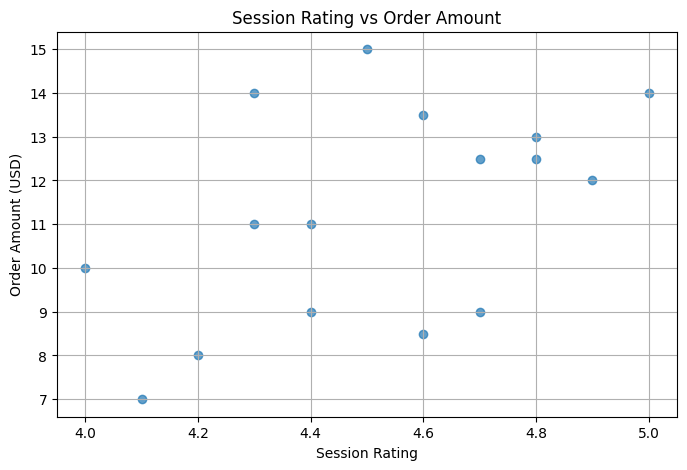

In [55]:
# Correlation between session rating and order amount
sessionamt = a['Session Rating'].corr(a['Amount (USD)'])

# Display the correlation
print(f"Correlation between Session Rating and Order Amount: {sessionamt:.2f}")


# Visualize the relationship
plt.figure(figsize=(8, 5))
plt.scatter(a['Session Rating'], a['Amount (USD)'], alpha=0.7)
plt.title('Session Rating vs Order Amount')
plt.xlabel('Session Rating')
plt.ylabel('Order Amount (USD)')
plt.grid()
plt.show()

> From the above Scatter plot I can say that the correlation coefficient of 0.50 suggests a moderate positive relationship between Session Rating and Order Amount.Most sessions with higher ratings (above 4.5) tends to have higher order amounts.


2.  Popular Dishes and Meal Trends

Top 5 Popular Dishes:
Dish Name_x
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Name: count, dtype: int64

Meal Type Distribution:
Meal Type_x
Dinner       8
Lunch        5
Breakfast    3
Name: count, dtype: int64


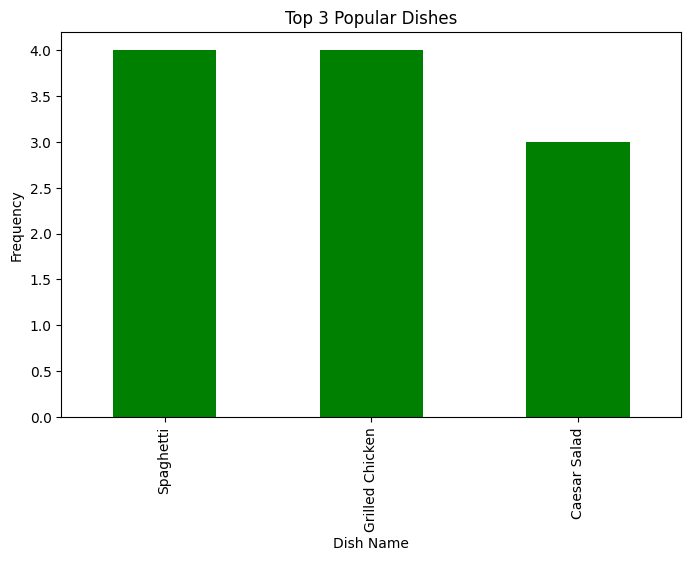

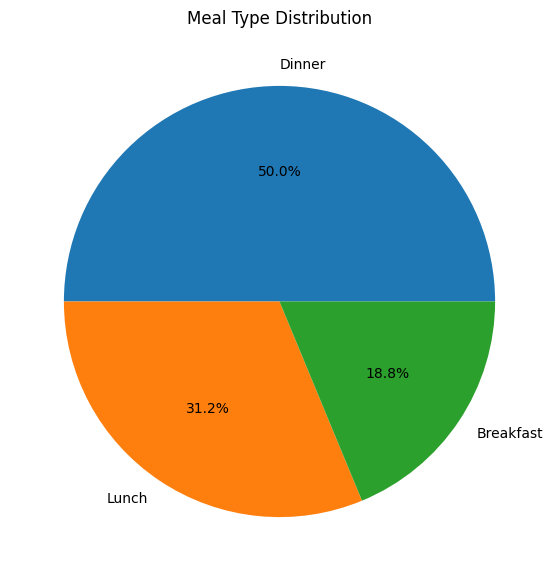

In [64]:
# Top 3 dishes
popular_dishes = a['Dish Name_x'].value_counts().head(3)

# Meal type distribution
meal_type_distribution = a['Meal Type_x'].value_counts()

# Display the results
print("Top 5 Popular Dishes:")
print(popular_dishes)
print("\nMeal Type Distribution:")
print(meal_type_distribution)

# Visualize popular dishes
popular_dishes.plot(kind='bar', title='Top 3 Popular Dishes', figsize=(8, 5),color='green')
plt.xlabel('Dish Name')
plt.ylabel('Frequency')
plt.show()

# Visualize meal type distribution
meal_type_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7), title='Meal Type Distribution')
plt.ylabel('')
plt.show()


> So we have more demand for Grilled Chiken & Spaghetti in addition to that we can say that most of the reveneue is generated during dinner time

3. Demographic Factors Influencing Behavior

Average Session Rating by Age Group:
Age Group
18-25    4.800000
26-35    4.427273
36-45    4.700000
Name: Session Rating, dtype: float64

 Meal Preferences by Age Group:
Age Group  Meal Type_x
18-25      Dinner         1
26-35      Dinner         5
           Lunch          4
           Breakfast      2
36-45      Dinner         2
           Breakfast      1
           Lunch          1
Name: count, dtype: int64


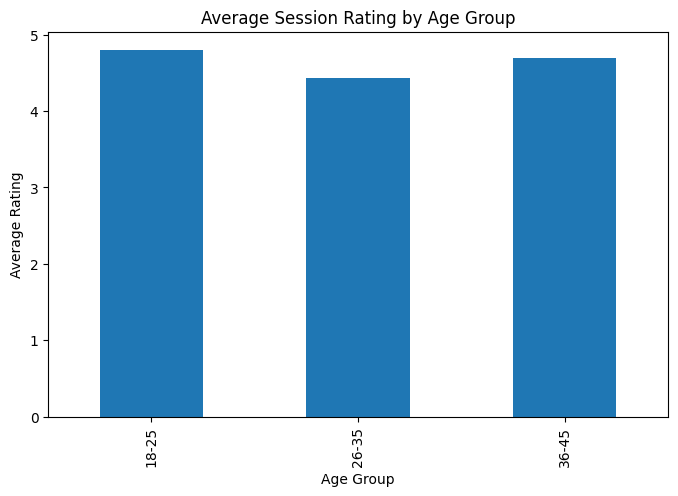

In [66]:
# Average session rating by age group
rate_age = a.groupby('Age Group')['Session Rating'].mean()

# Meal preference by age group
meal_age = a.groupby('Age Group')['Meal Type_x'].value_counts()

# Display results
print("Average Session Rating by Age Group:")
print(rate_age)
print("\n Meal Preferences by Age Group:")
print(meal_age)

# Visualize ratings by age group
rate_age.plot(kind='bar', figsize=(8, 5), title='Average Session Rating by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.show()


> Age group b/w 18-25 and 36-45 have  have average rating so we can focus on these kind of customer to boost the company

# Summary & Recommendations

* Session Ratings and Order Amount:Higher session ratings tend to correspond with higher spending, but this relationship is not strong enough to be the sole driver of order amounts it's just assumption.
  
* Popular Dishes and Meal Preferences:The top dishes include Spaghetti and Grilled Chicken
Dinner is the most popular meal type (50% of sessions), followed by Lunch (31.2%) and Breakfast (18.8%).
So we can create marketing campaigns around the most popular dishes and focus on dinner promotions

* Users in the 36-45 age group tend to give the highest session ratings, followed by the 18-25 group.We can also focus on the frequent dishes ordered by these customer and understand the behaviour pattern by getting the feedback.